# **Importing Library**




In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
sns.set_style(style = 'whitegrid')

# **Importing Data**

In [4]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv')
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


# ***EDA***

In [5]:
df.shape

(30, 17)

In [6]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


## **checking null value**

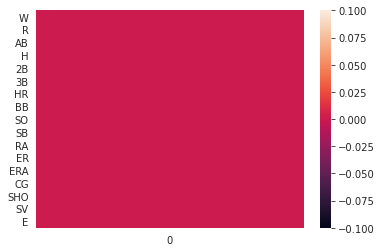

In [7]:
sns.heatmap(df.isnull().sum().to_frame())

In [8]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


## **Visualization**

In [10]:
def pplot(df,i):
  plt.figure(figsize=(20,5))
  plt.subplot(1,3,1)
  
  sns.histplot(x=i,data=df,kde=True)
  plt.subplot(1,3,2)
  sns.regplot(x=i,y='W',data=df)
  plt.subplot(1,3,3)
  sns.boxplot(y=i,data=df)
  plt.show()

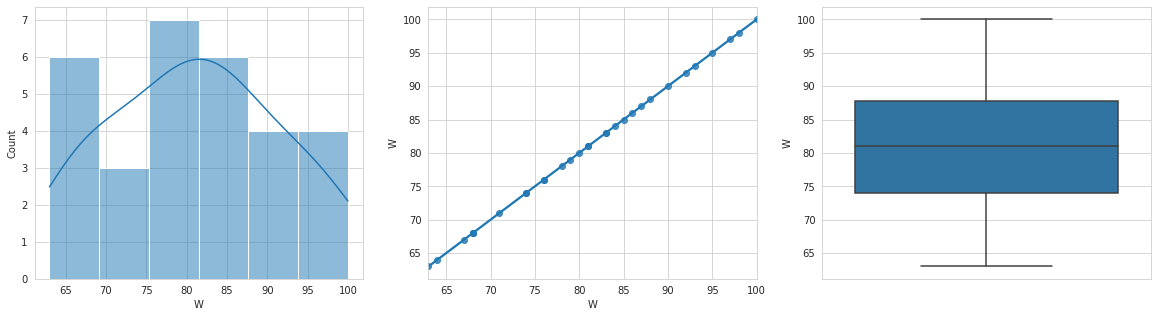

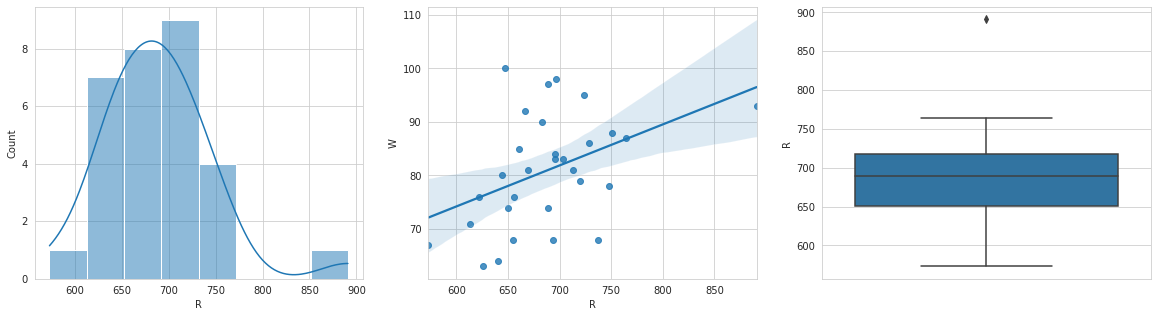

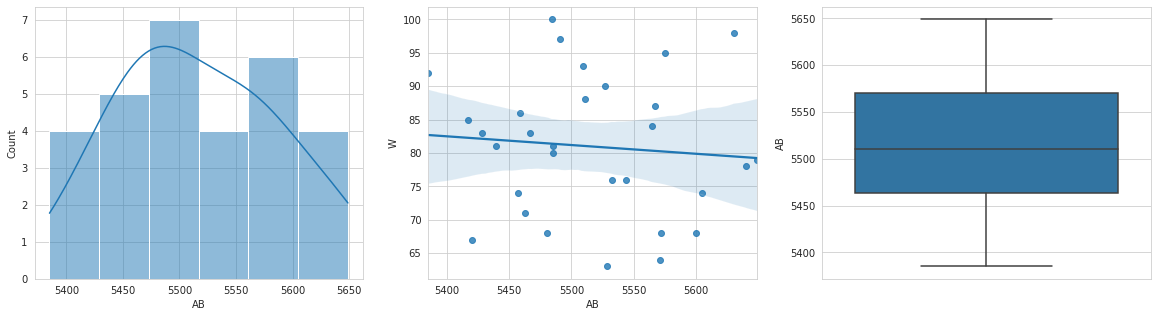

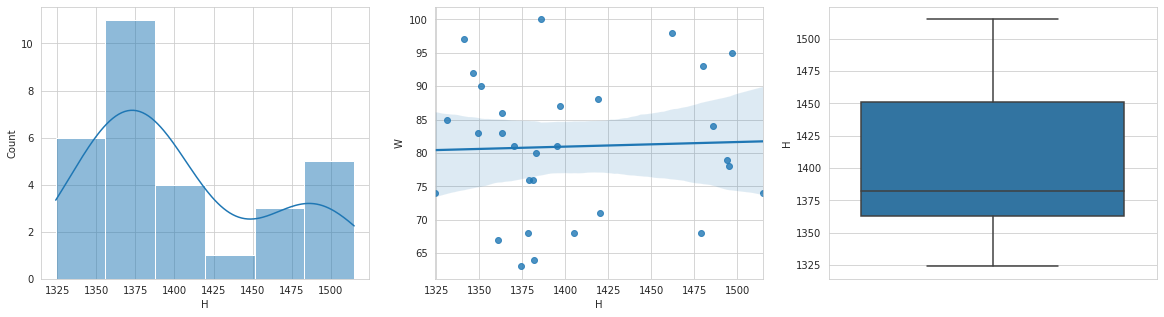

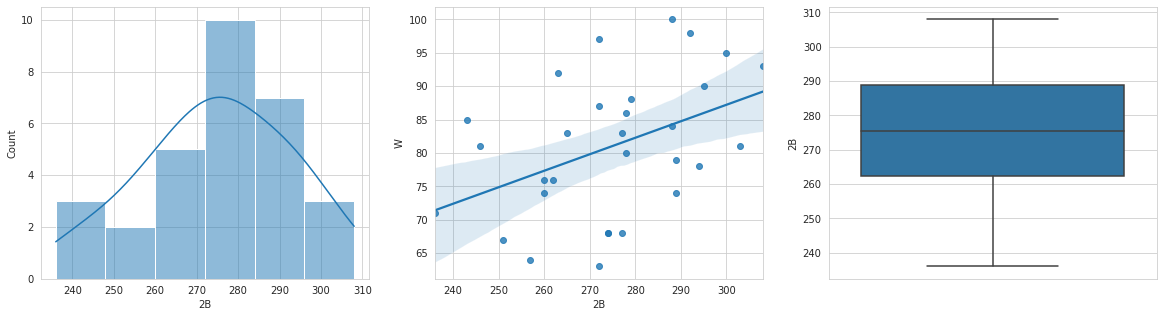

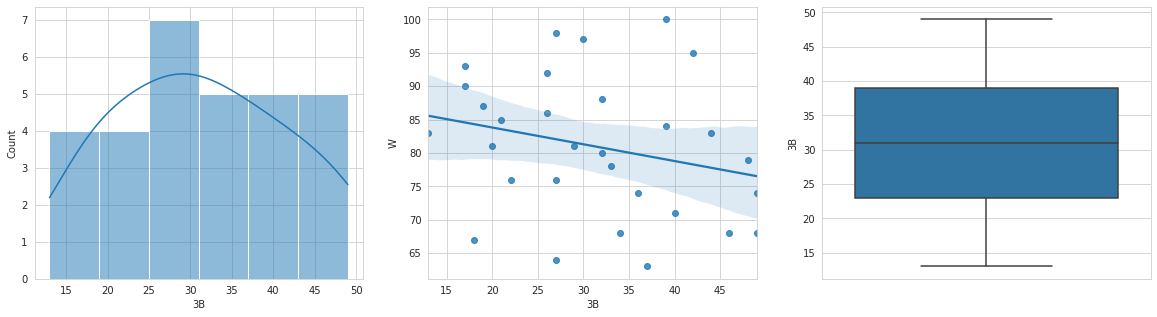

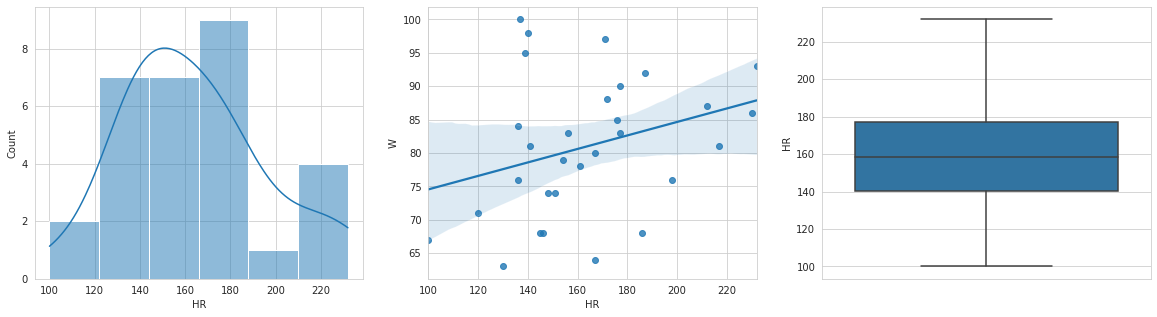

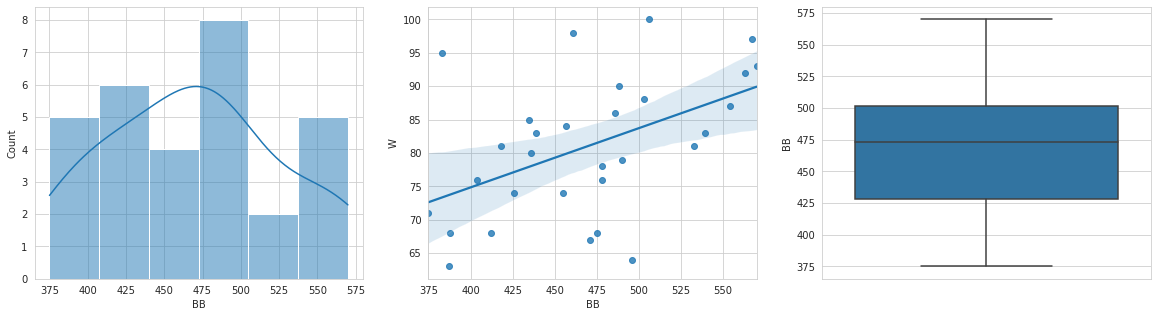

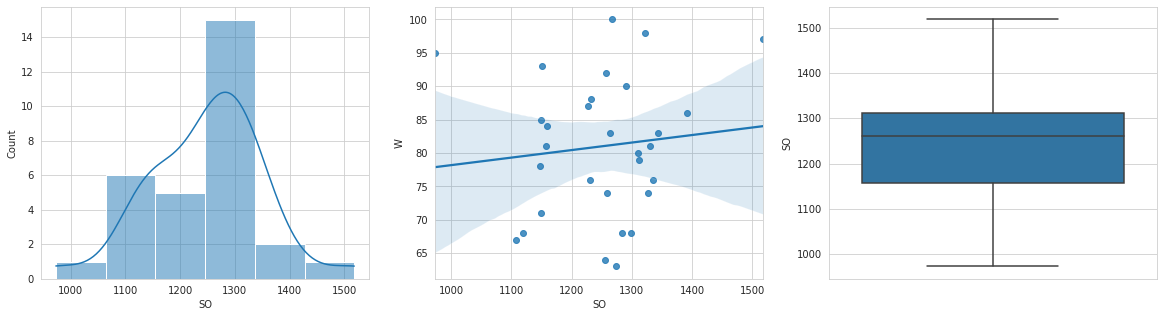

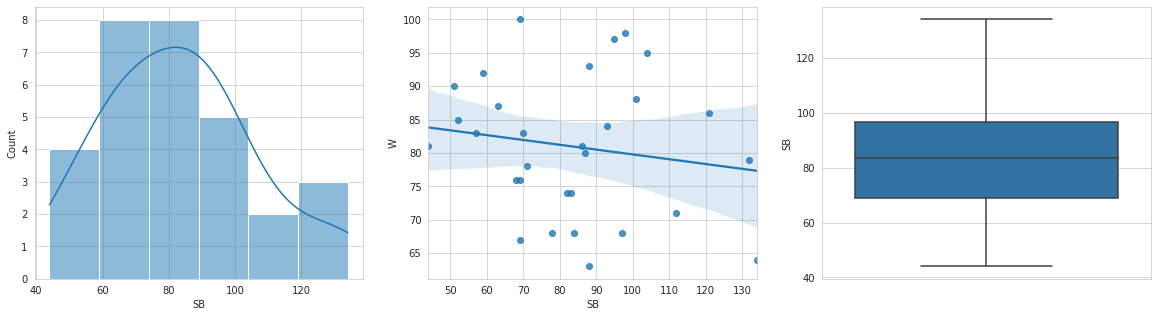

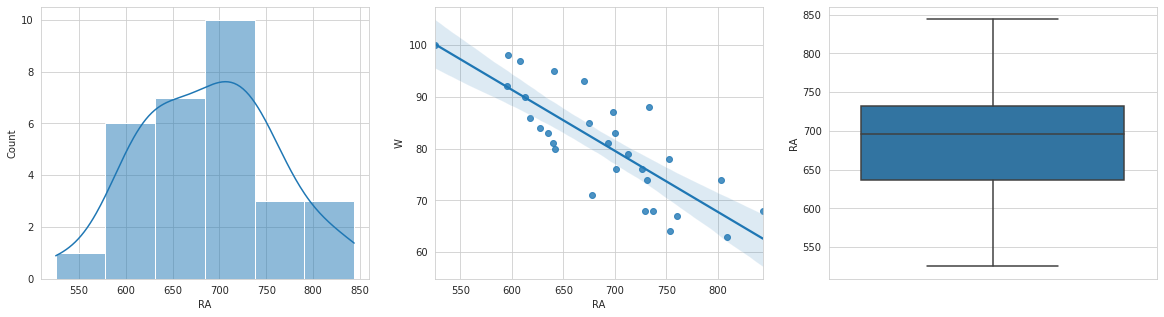

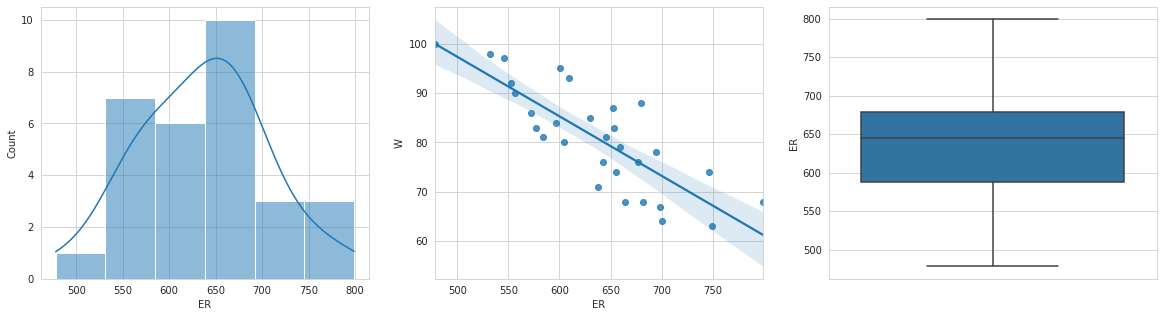

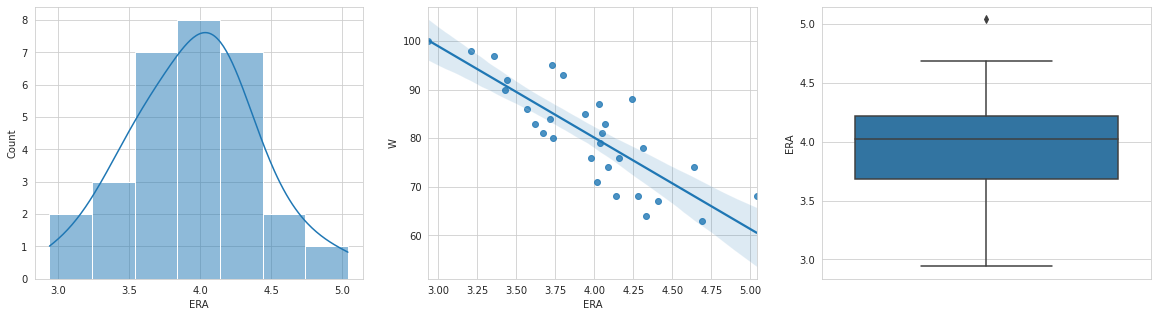

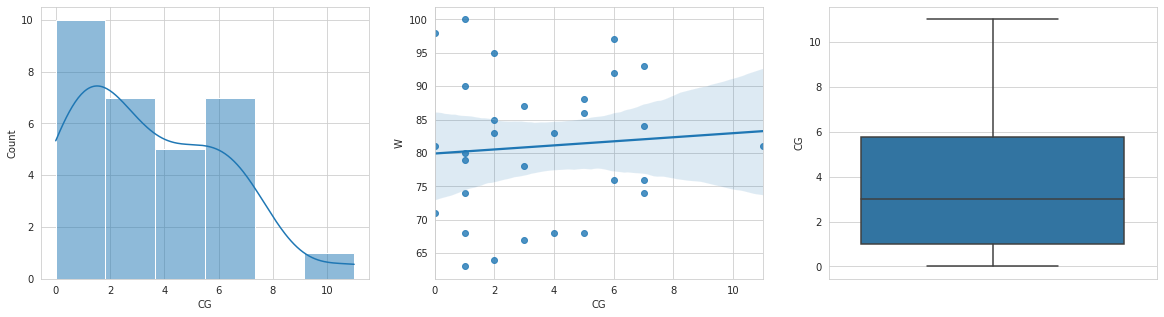

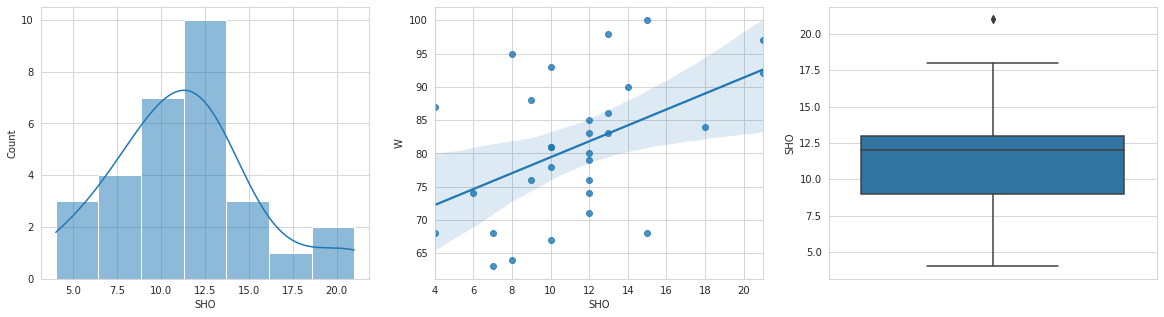

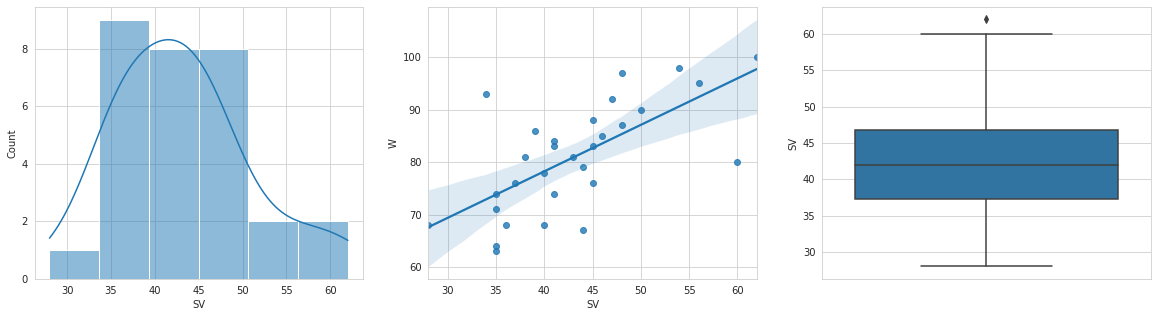

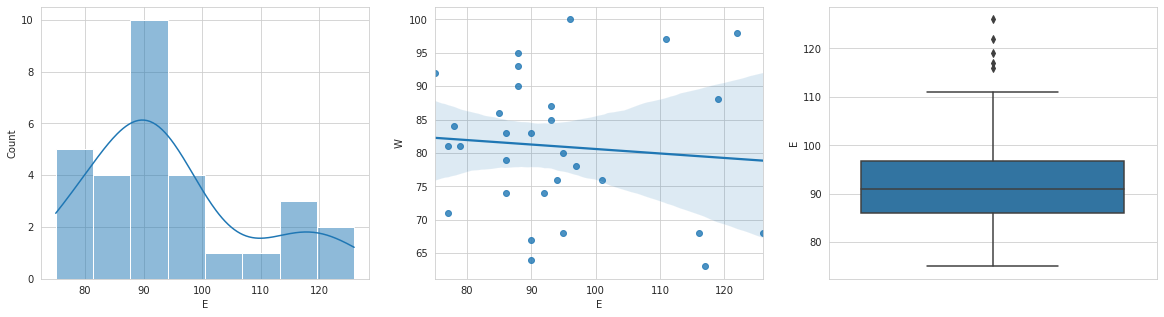

In [11]:
import scipy.stats as stat
import pylab 
for i in df.columns:
  pplot(df,i)

AB, H, so, sb, cg, E are not related to win



Data filtering:-

In [12]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


**dataset contain numeric characters**

**Encoding**:- Not required

In [13]:
x=df.drop('W',axis=1)
y=df['W']

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [15]:
from sklearn.preprocessing import power_transform as PT
pt=pd.DataFrame()
for i in df.columns:
  if df[i].min()<=0:
    pt1=(df[i]-df[i].min()+0.0001)
  else:
    pt1=df[i]
  pt=pd.concat([pt,pd.DataFrame(pt1)],axis=1)

pt1=PT(pt)
pt1=pd.DataFrame(pt1,columns=df.columns)


In [16]:
def pplot(df,i):
  plt.figure(figsize=(20,5))
  plt.subplot(1,3,1)
  
  sns.histplot(x=i,data=df,kde=True)
  plt.subplot(1,3,2)
  stat.probplot(df[i],dist='norm',plot=pylab)
  plt.subplot(1,3,3)
  sns.boxplot(y=i,data=df)
  plt.show()

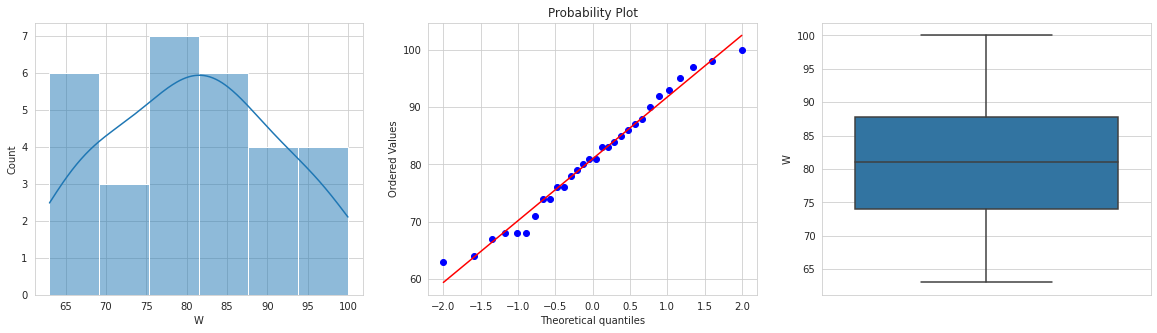

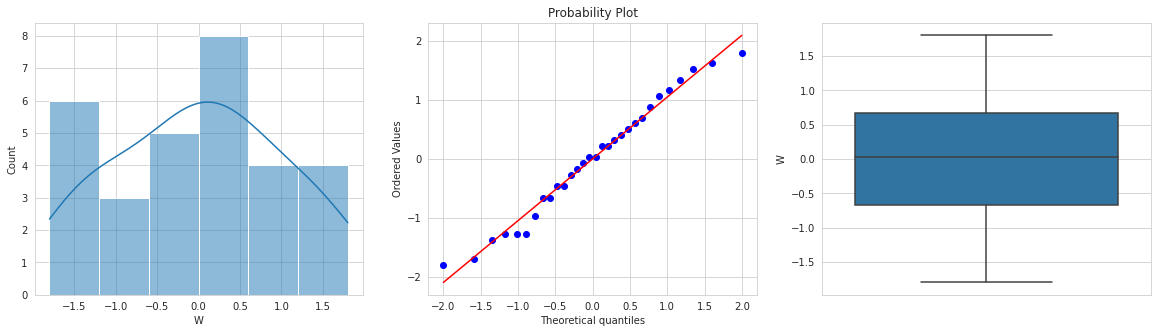

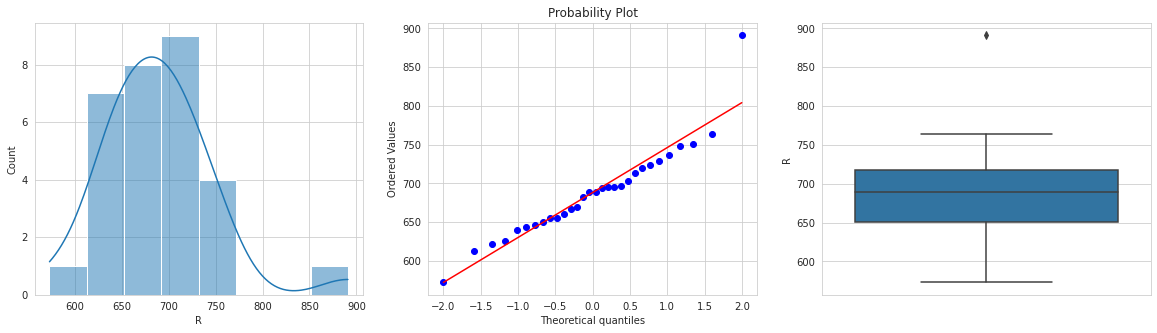

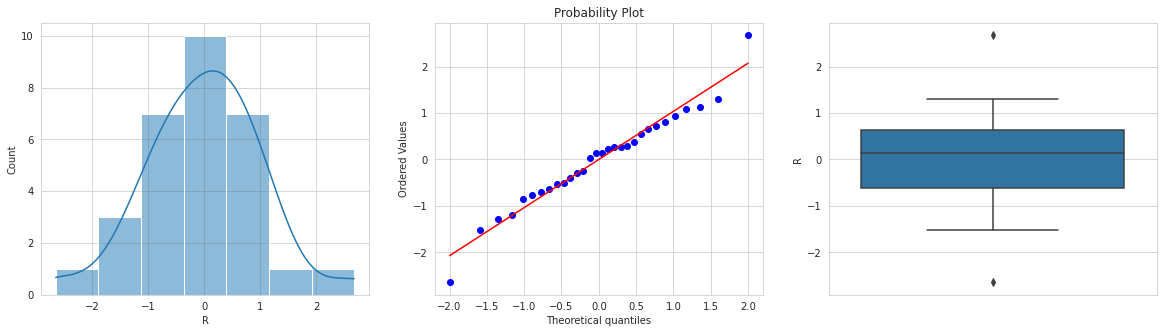

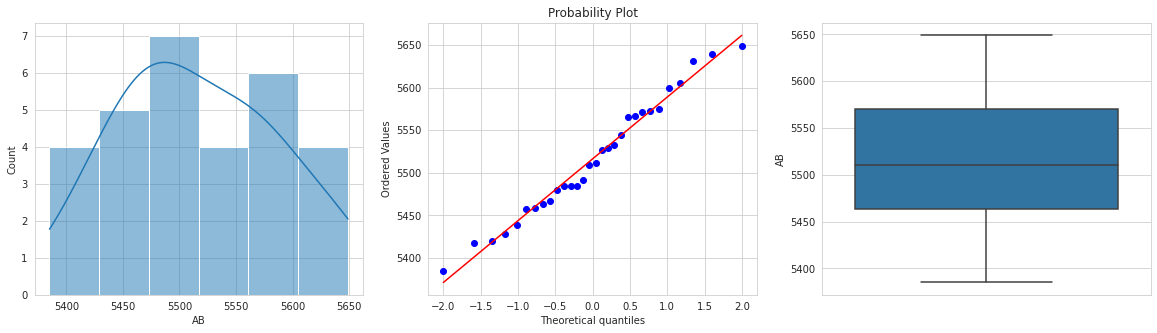

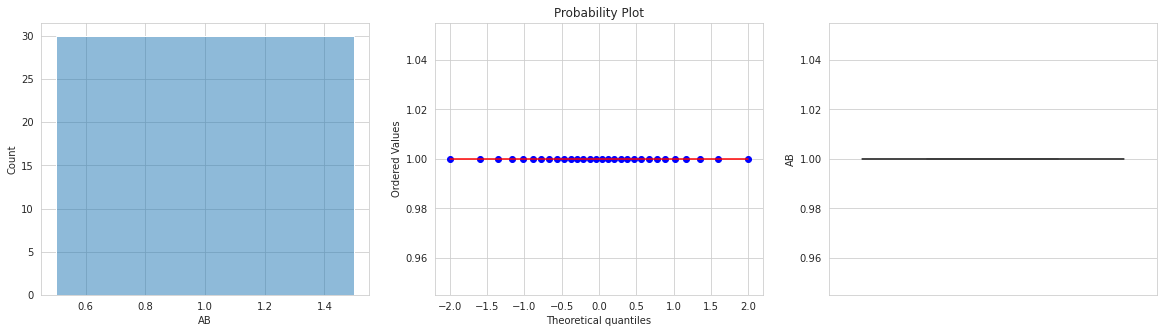

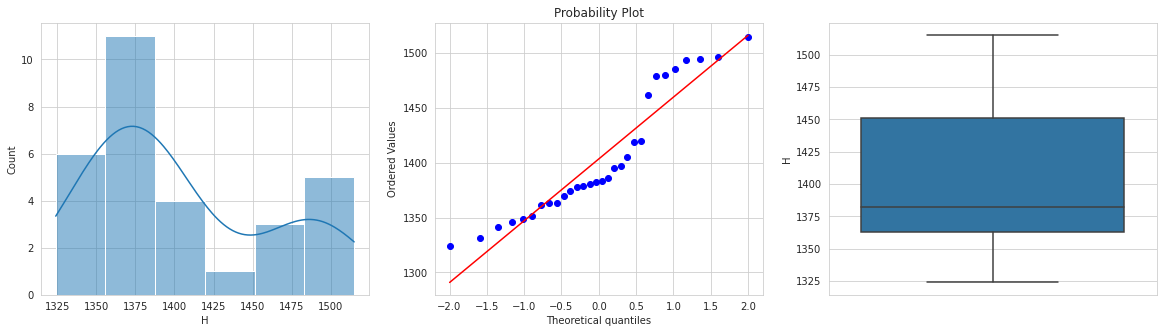

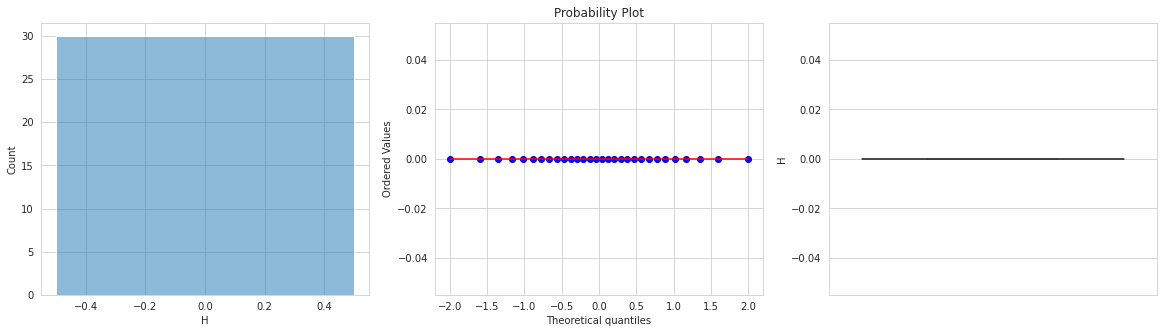

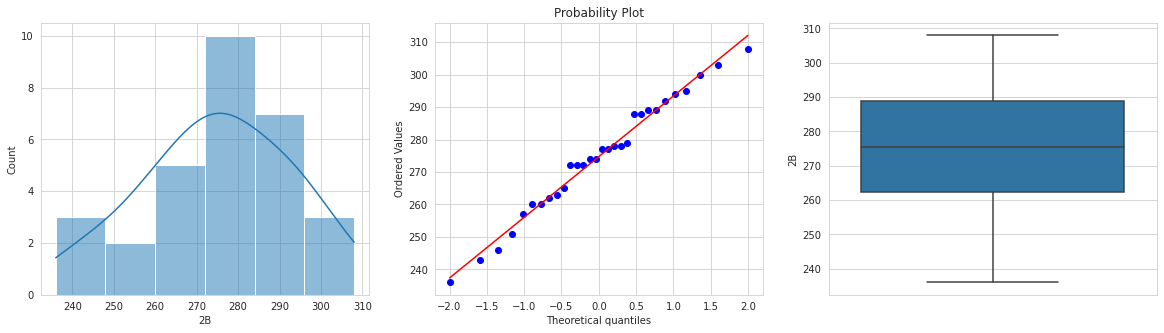

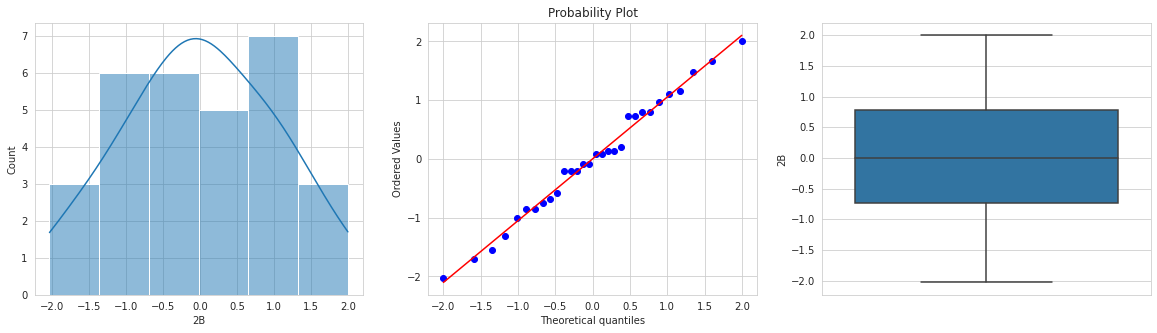

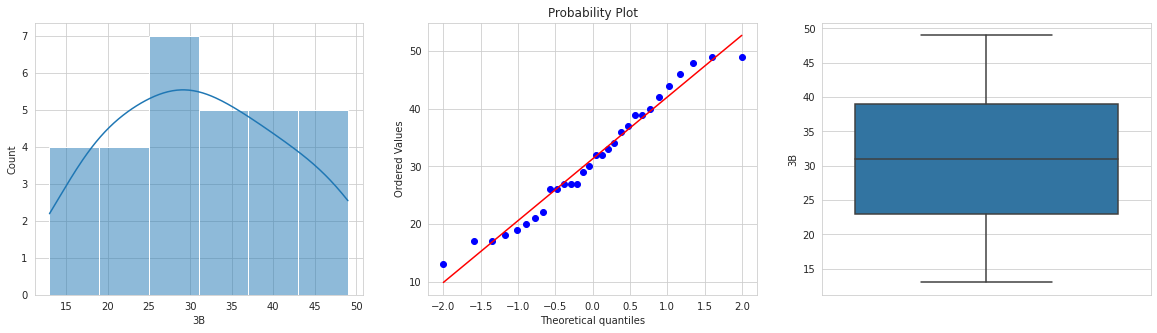

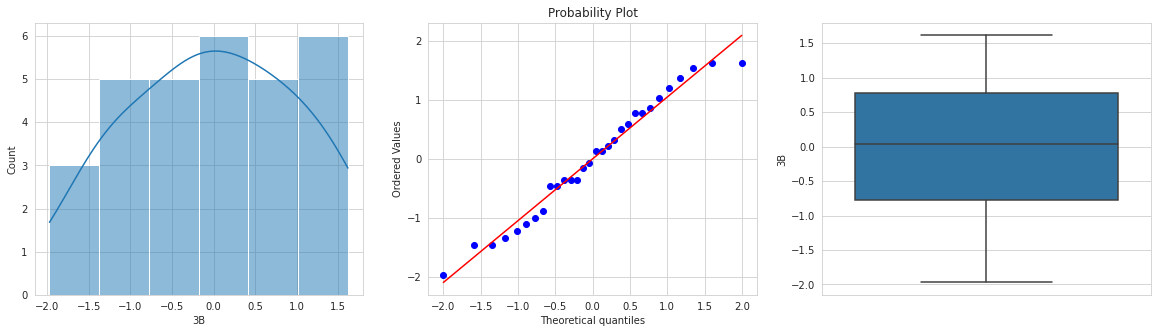

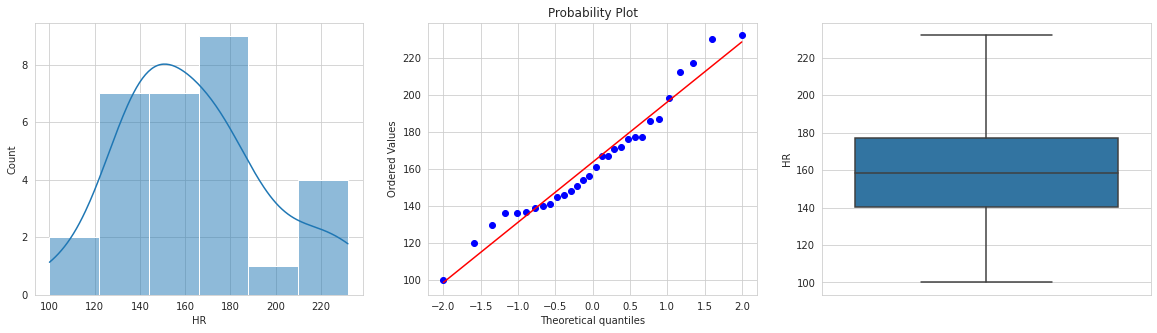

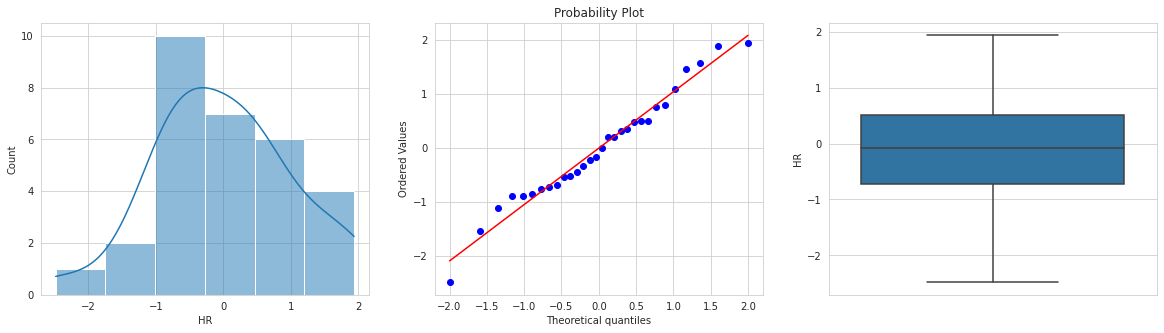

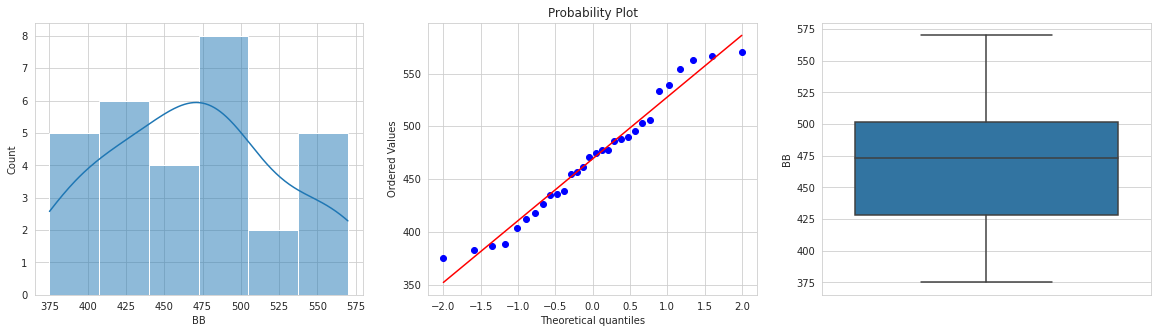

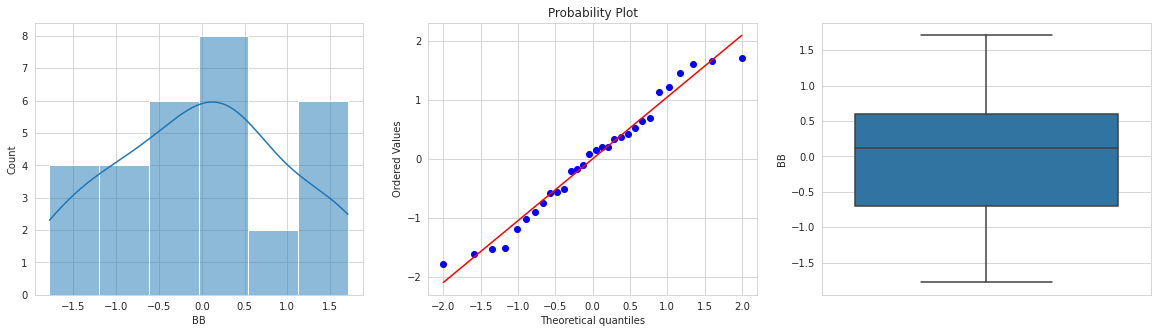

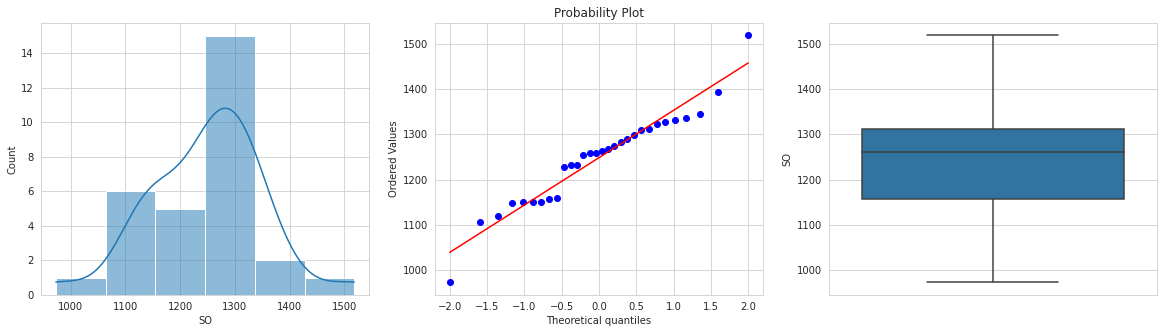

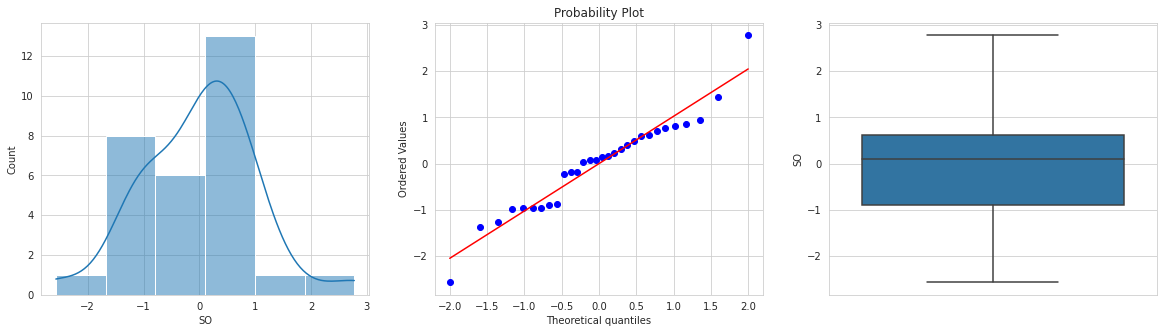

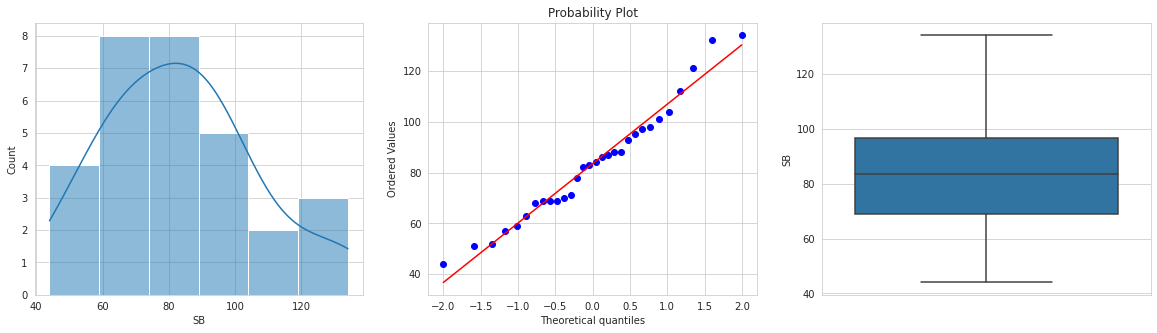

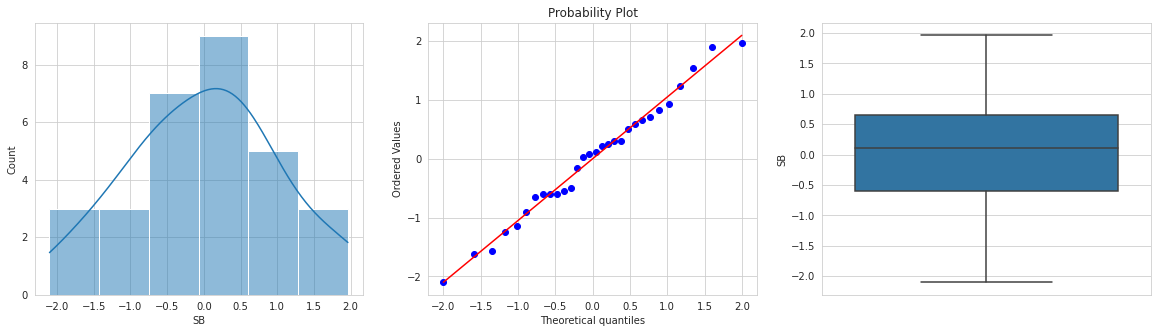

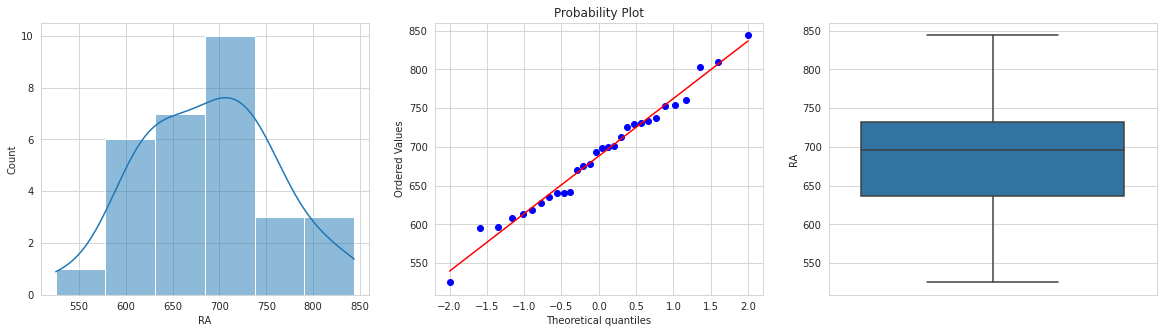

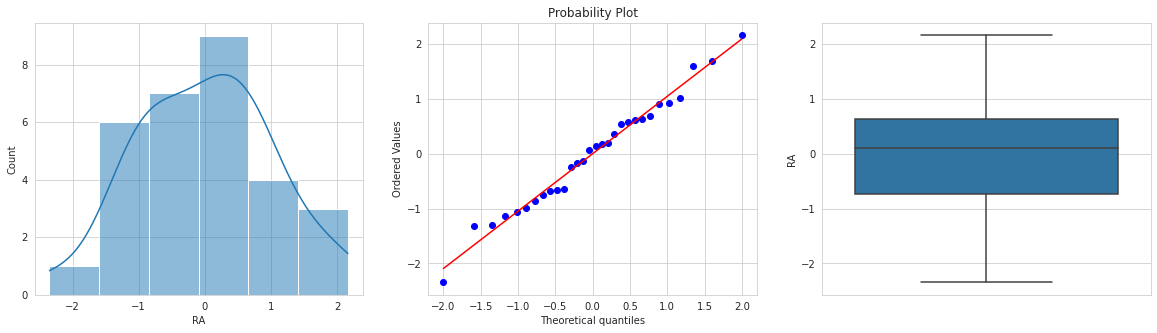

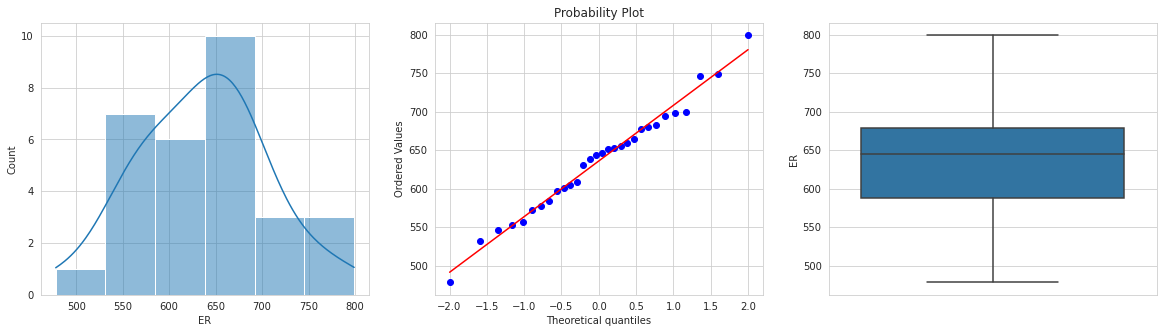

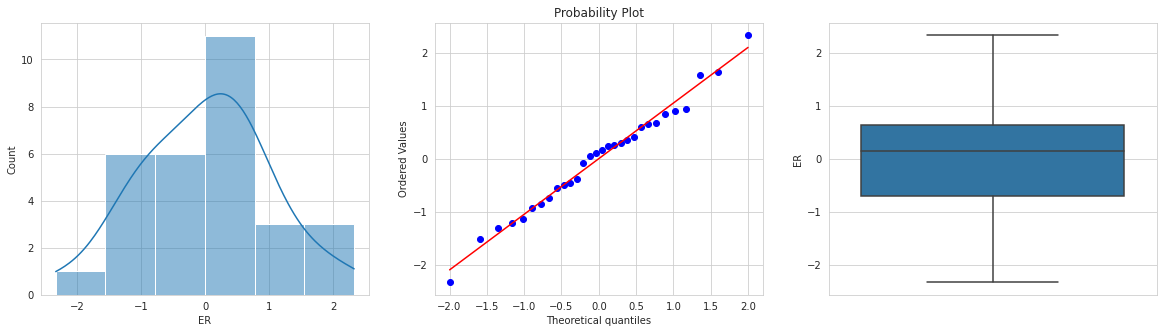

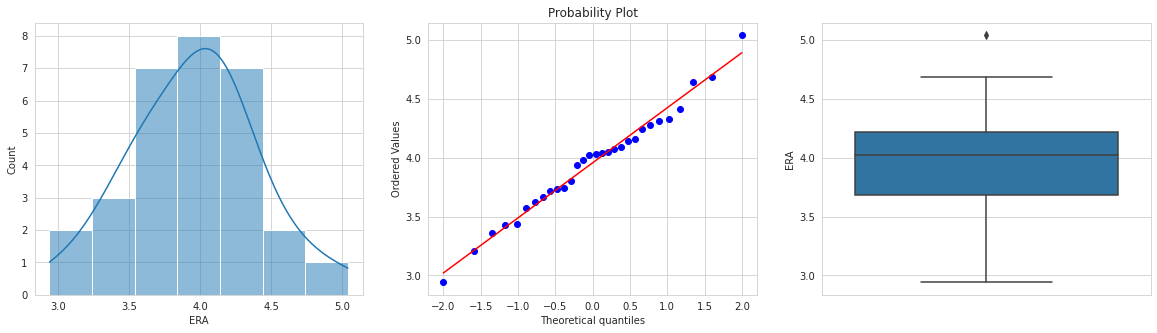

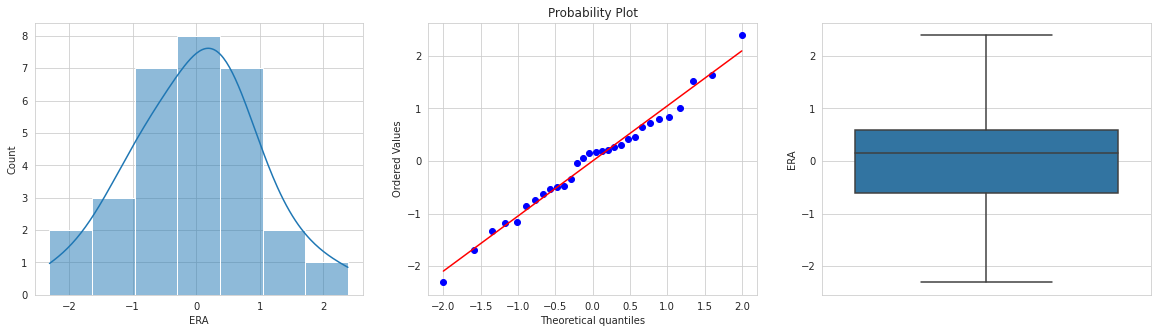

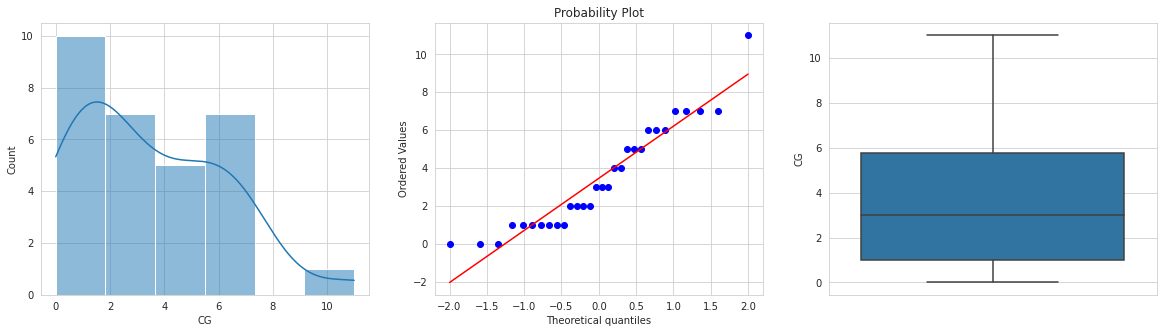

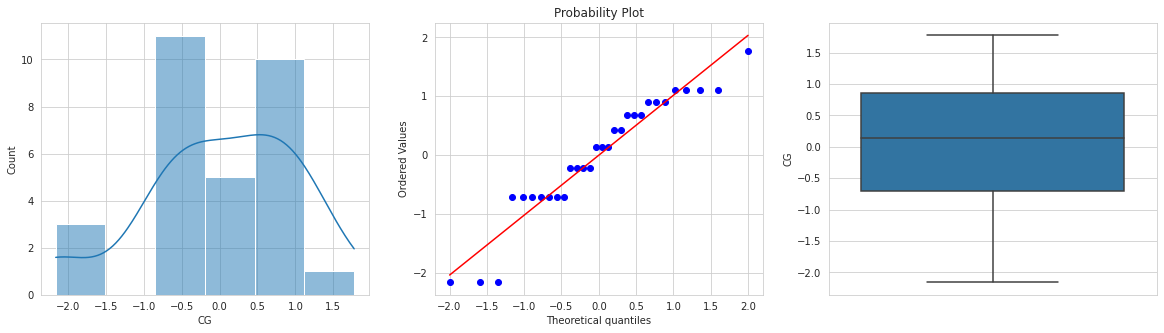

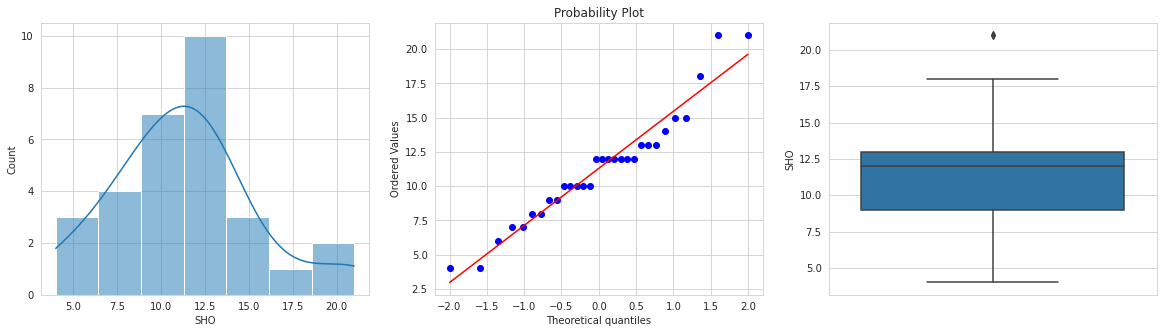

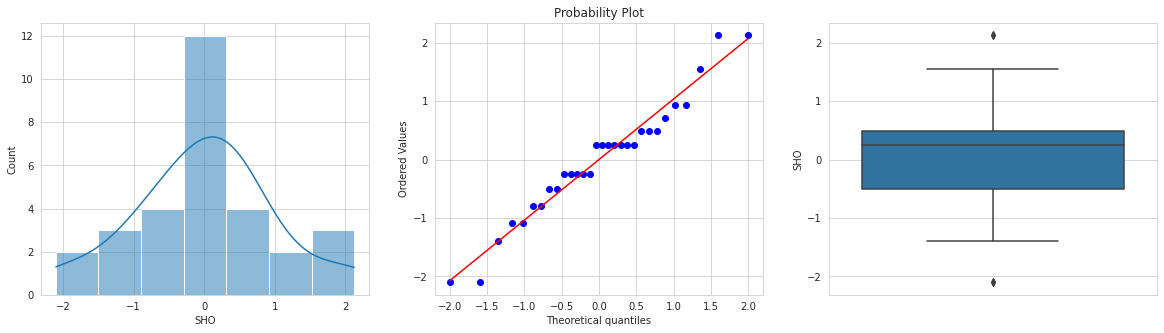

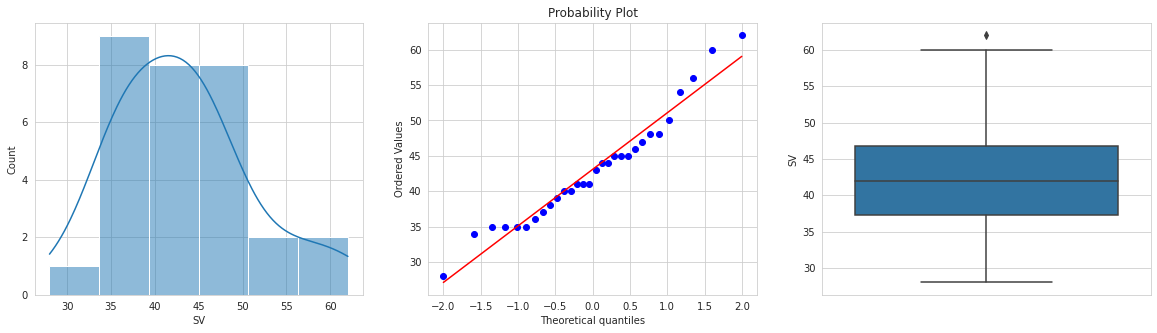

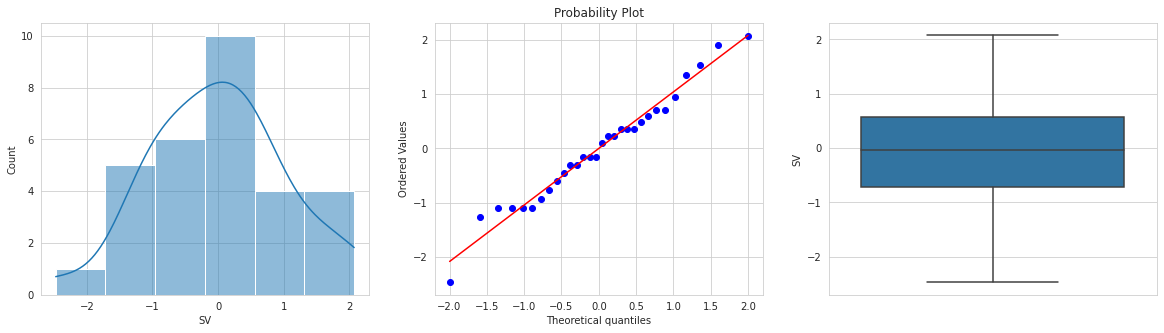

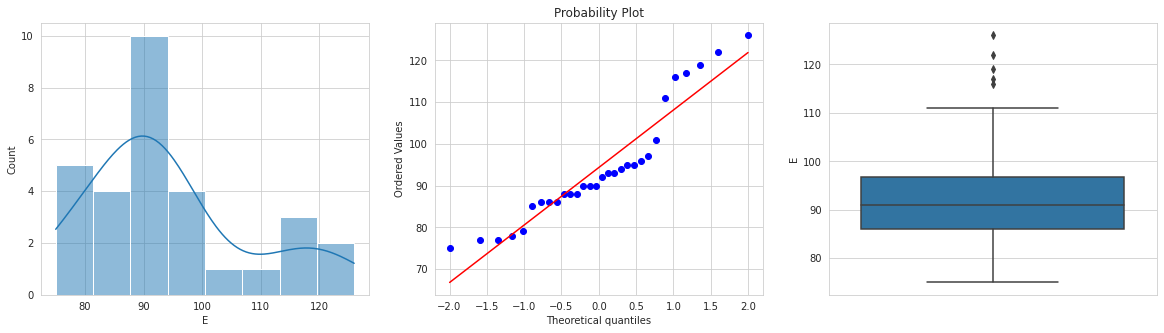

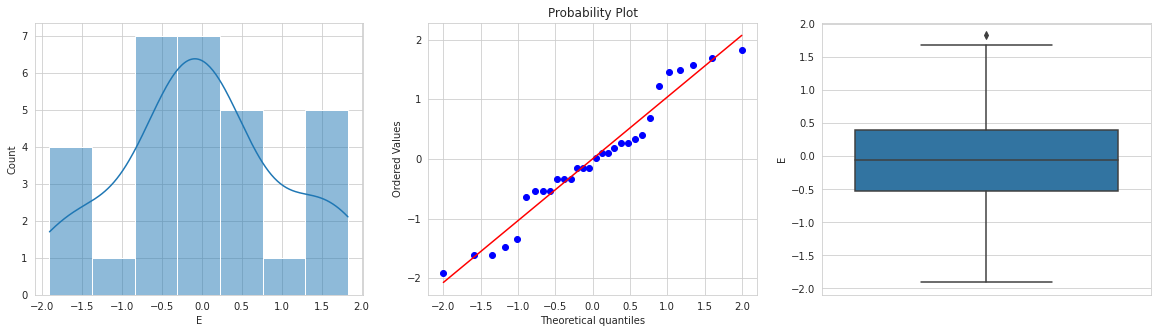

In [17]:
import scipy.stats as stat
import pylab 
for i in df.columns:
  pplot(df,i)
  pplot(pt1,i)

after transformation ab and h are totally flattened 

## **Correlation**

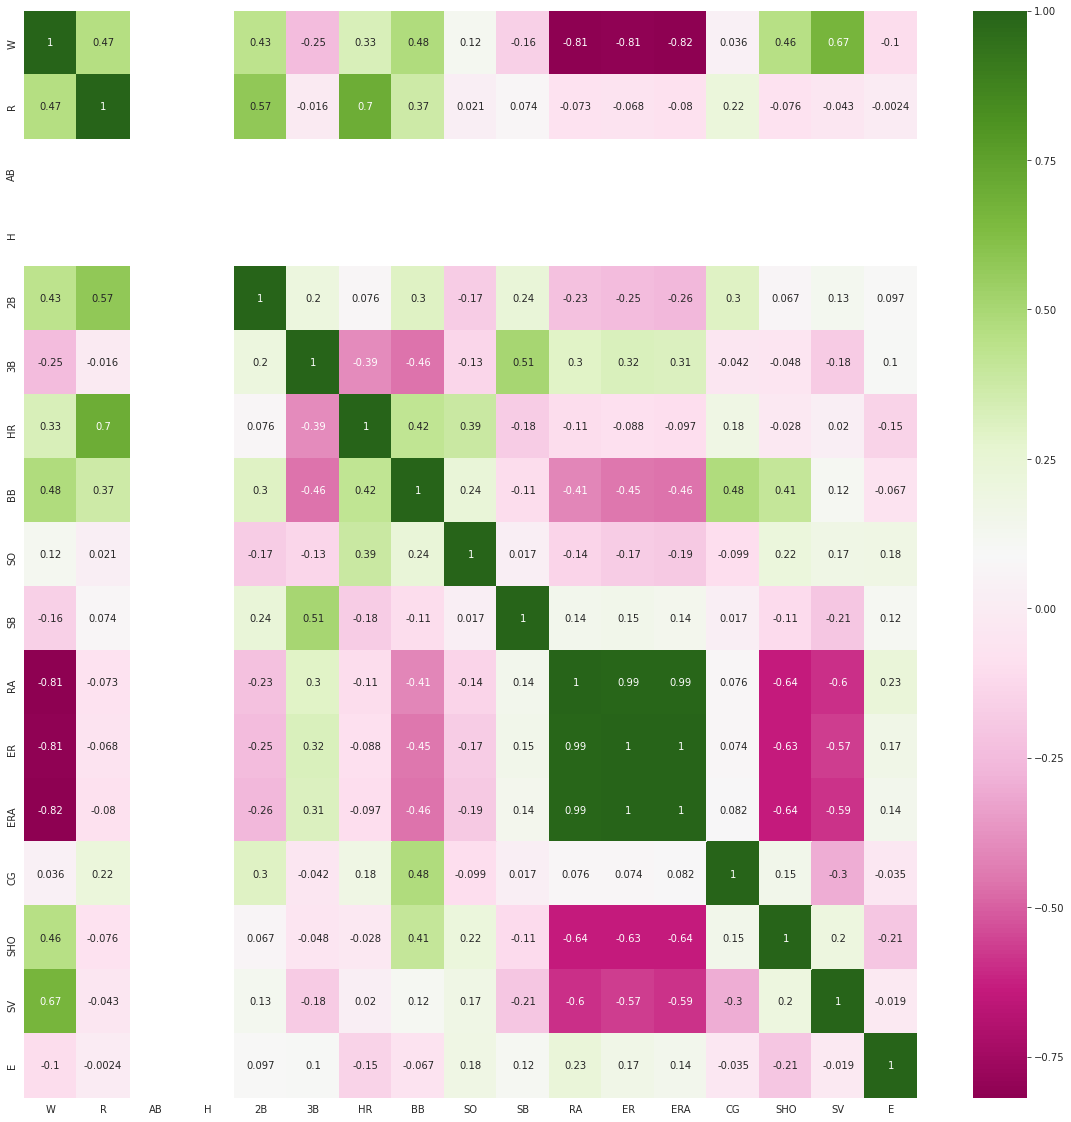

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(pt1.corr(),annot=True,cmap='PiYG')

high multicollinearity exist

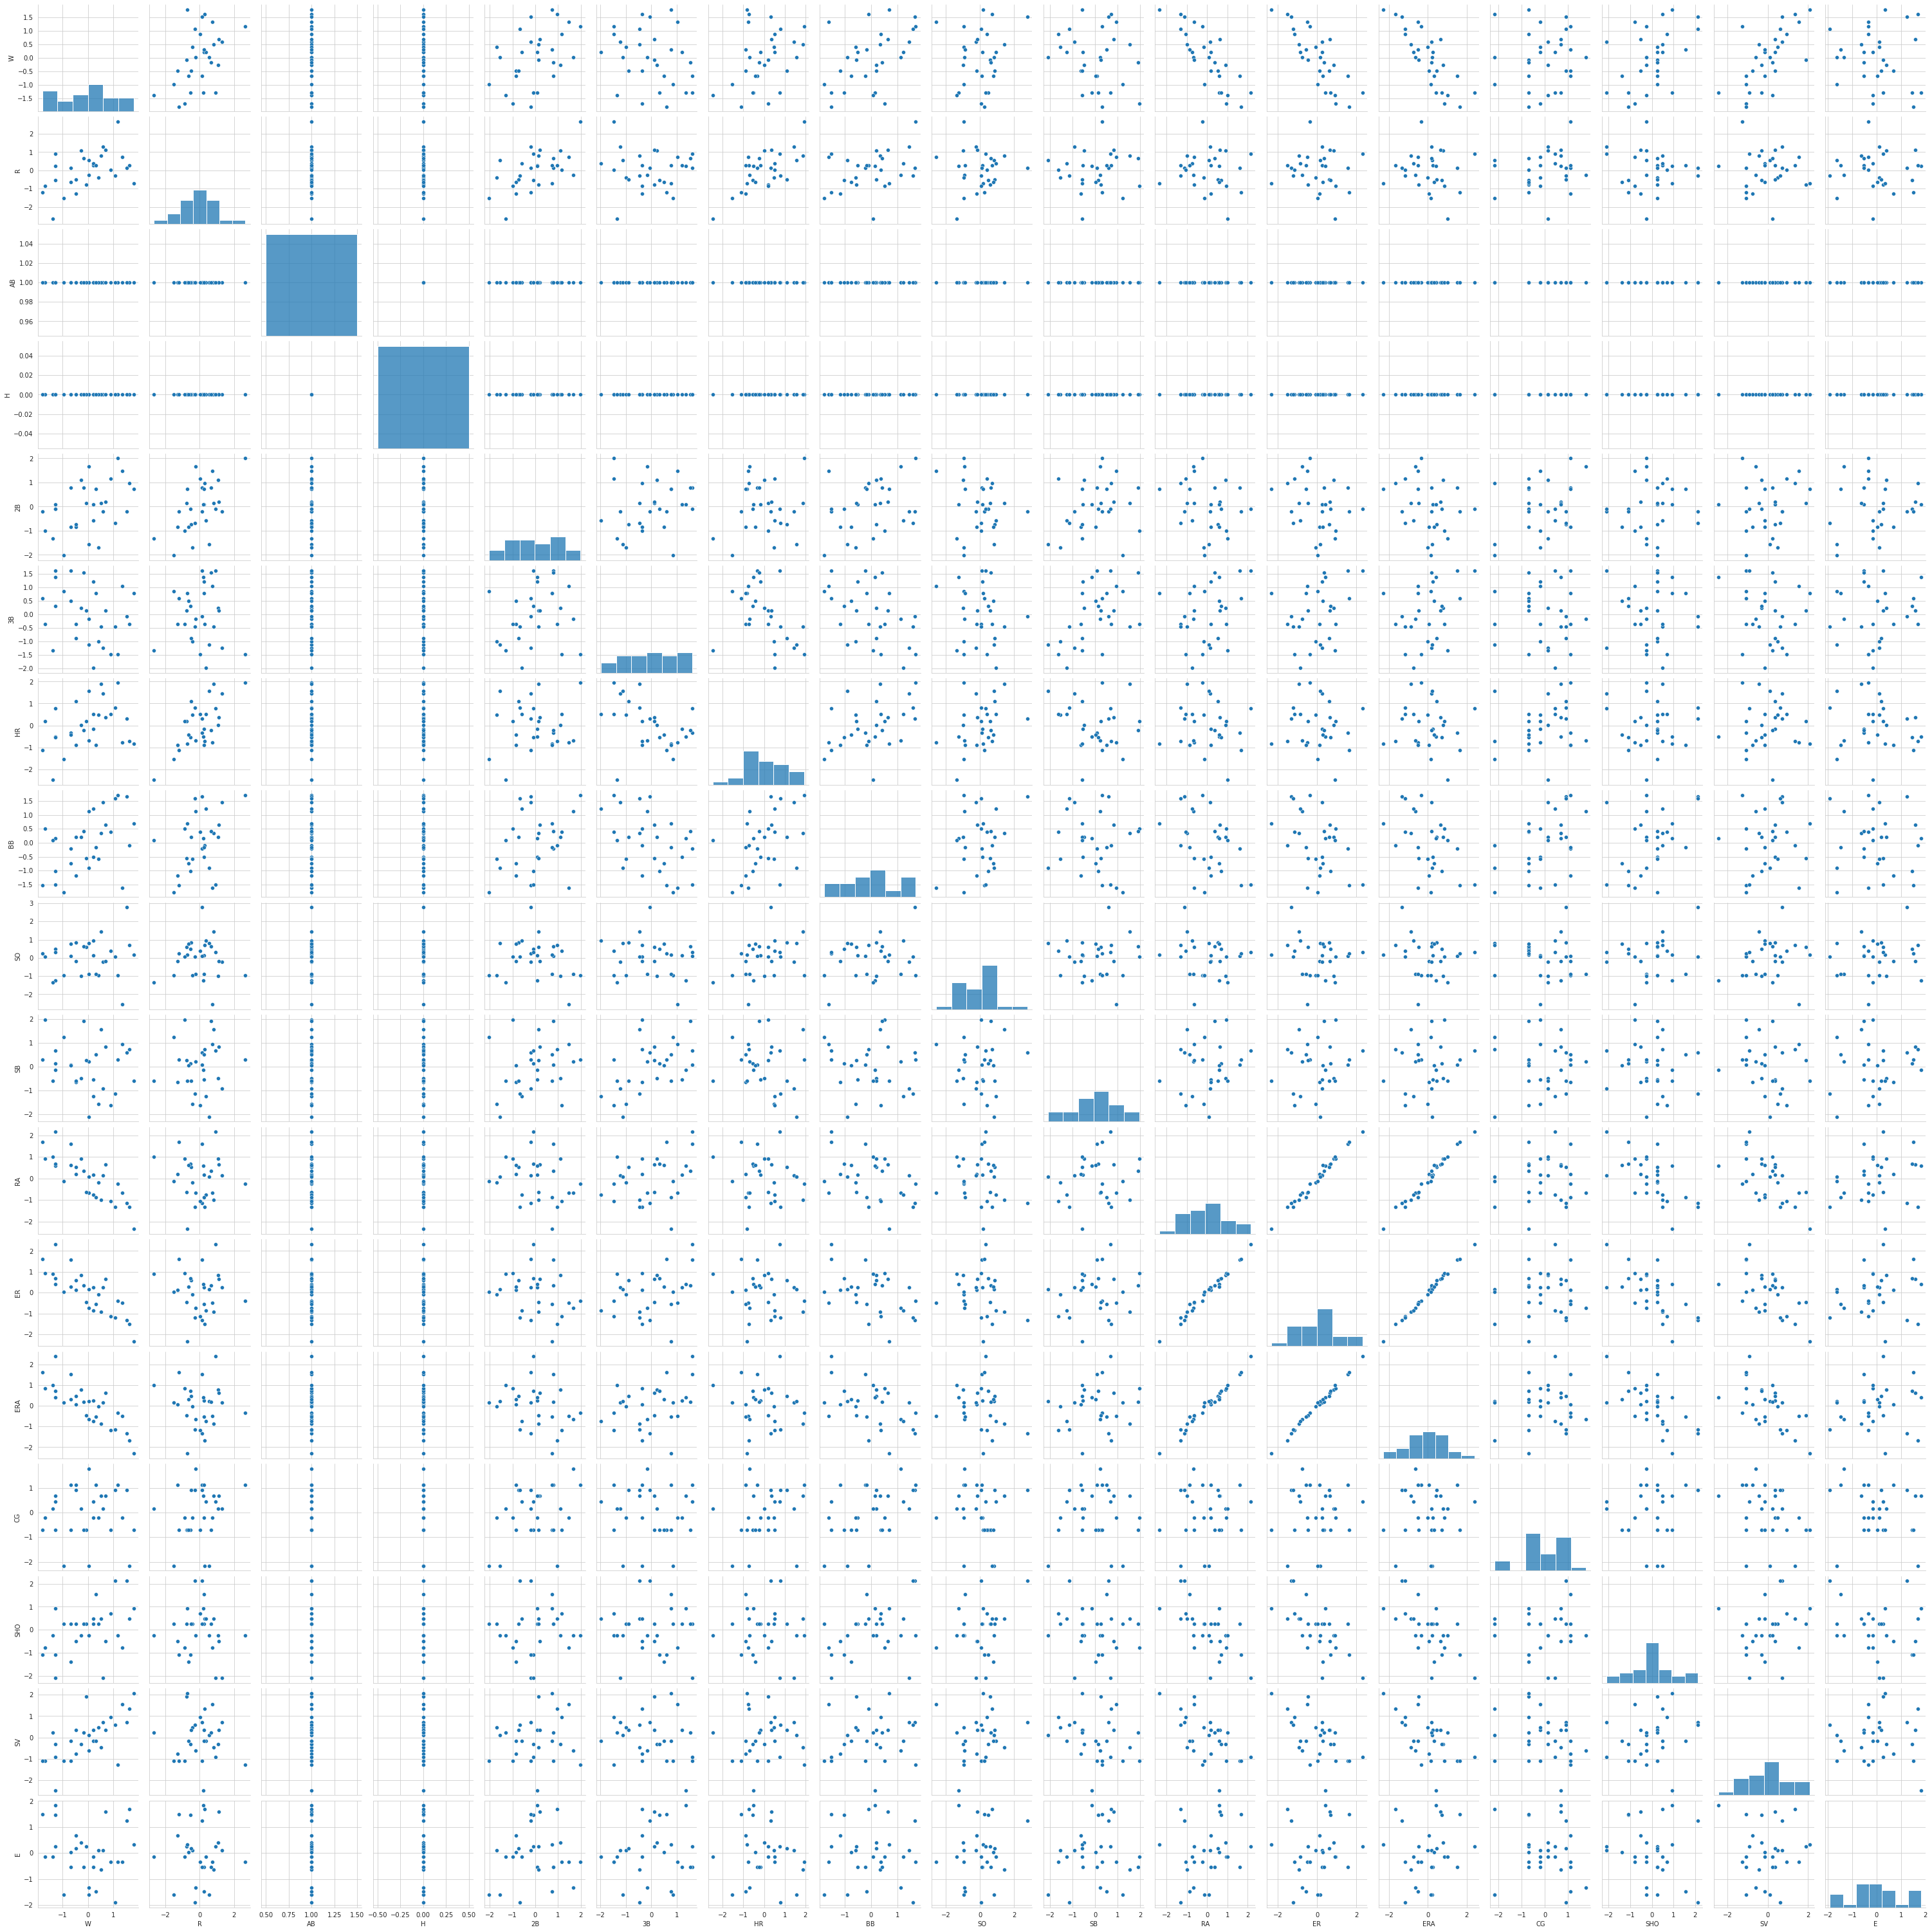

In [ ]:
sns.pairplot(pt1)

## **Anova test**

In [18]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
s = SelectKBest(f_classif, k=15)
s.fit(x,y)

SelectKBest(k=15, score_func=<function f_classif at 0x7fbd5e5c4950>)

In [19]:
pd.DataFrame([s.scores_,s.pvalues_],columns=x.columns).T.sort_values(by=0)

,0,1
CG,0.383449,0.955385
H,0.763151,0.707804
3B,0.850035,0.647067
2B,0.904863,0.610500
HR,0.989166,0.557499
BB,1.048384,0.522774
SHO,1.204067,0.441457
SO,1.509218,0.319694
AB,1.552727,0.305758
ER,1.574876,0.298946


almost all variable are not related to output and r2 for this dataset will be negative as mostly p>0.05

## **Separating dependent and independent variables**

In [20]:
x=pt1.drop('W',axis=1)
y=pt1['W']

In [21]:
from sklearn.model_selection import train_test_split as TTS
x_train,x_test,y_train,y_test=TTS(x,y,test_size=0.3,random_state=42)

In [22]:
from sklearn.preprocessing import StandardScaler as SS
ss=SS()
x_train_scaler=ss.fit_transform(x_train)
x_test_scaler= ss.transform(x_test)

# **Model Evaluation**

## **Linear Regression**(0.34)

In [23]:
from sklearn.linear_model import LinearRegression as lr
reg_lr = lr(normalize=True).fit(x_train,y_train)
y_pred=reg_lr.predict(x_test_scaler)
from sklearn.metrics import mean_squared_error as rms, r2_score
print(r2_score(y_test,y_pred))
print(rms(y_test,y_pred))

0.7300099230168454
0.34183078147729096


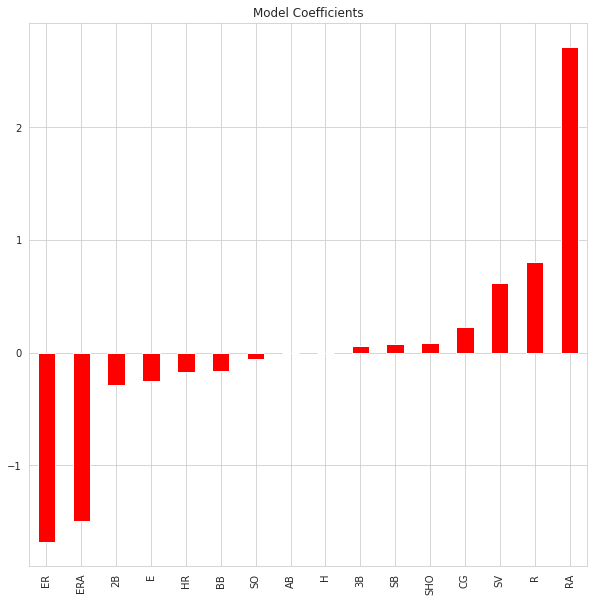

In [24]:
coef = pd.Series(reg_lr.coef_, x.columns).sort_values()
plt.figure(figsize=(10,10))
coef.plot(kind='bar', title="Model Coefficients" , color = 'red')

In [49]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(lr(normalize=True), x, y, cv=10,scoring='neg_mean_squared_error')

lr_reg=cv_results['test_score'].mean()

## **Ridge**(0.31)

In [28]:
from sklearn.linear_model import Ridge
reg_lr = Ridge().fit(X=x_train_scaler,y=y_train)
y_pred=reg_lr.predict(x_test_scaler)
from sklearn.metrics import mean_squared_error as rms, r2_score
print(r2_score(y_test,y_pred))
print(rms(y_test,y_pred))

0.8862370899852254
0.14403368030413738


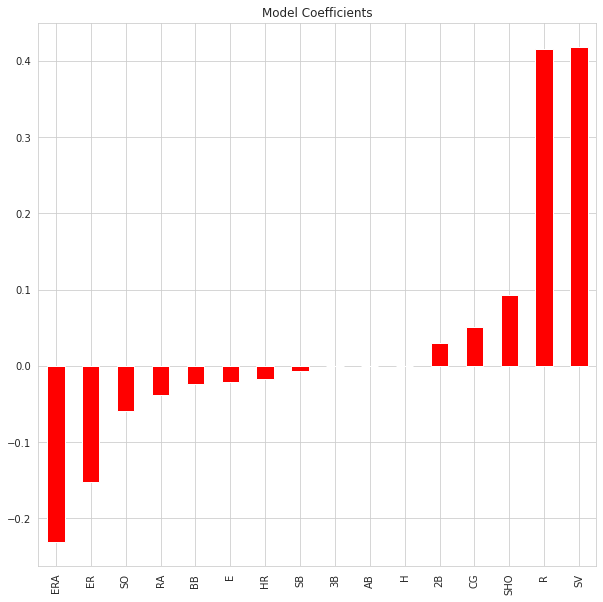

In [29]:
coef = pd.Series(reg_lr.coef_, x.columns).sort_values()
plt.figure(figsize=(10,10))
coef.plot(kind='bar', title="Model Coefficients" , color = 'red')

In [50]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(Ridge(), ss.transform(x), y, cv=3,scoring='neg_mean_squared_error')

rid_reg=cv_results['test_score'].mean()

## **Random Forest Regressor**(0.57)

In [31]:
from sklearn.ensemble import RandomForestRegressor as RFR 
reg_rfc = RFR().fit(x_train, y=y_train)
y_pred=reg_rfc.predict(x_test)
from sklearn.metrics import mean_squared_error as rms, r2_score
print(r2_score(y_test,y_pred))
print(rms(y_test,y_pred))

0.6984268906063944
0.3818176312568134


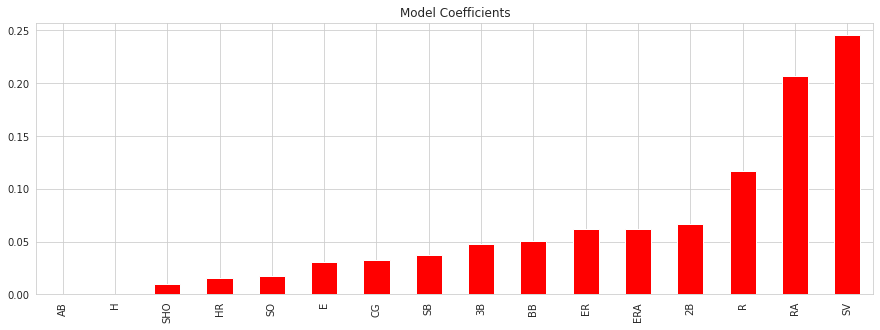

In [32]:
coef = pd.Series(reg_rfc.feature_importances_, x.columns).sort_values()
plt.figure(figsize=(15,5))
coef.plot(kind='bar', title="Model Coefficients" , color = 'red')

In [33]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(RFR(), x, y, cv=10,scoring='neg_mean_squared_error')

rfc_score=cv_results['test_score']


In [54]:
rfc_reg=rfc_score.mean()

## **XGB Regressor**(0.605)

In [35]:
from xgboost import XGBRegressor as XBR
xgr=XBR().fit(x_train,y_train)

y_pred = xgr.predict(x_test)
from sklearn.metrics import mean_squared_error as rms, r2_score
print(r2_score(y_test,y_pred))
print(rms(y_test,y_pred))


[01:42:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.6953916121306751
0.38566055624483453


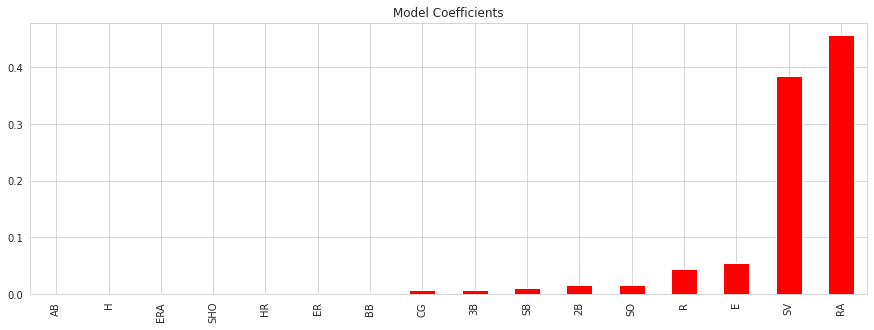

In [36]:
coef = pd.Series(xgr.feature_importances_, x.columns).sort_values()
plt.figure(figsize=(15,5))
coef.plot(kind='bar', title="Model Coefficients" , color = 'red')

In [39]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(XBR(), x, y, cv=10,scoring='neg_mean_squared_error')

xgr_score=cv_results['test_score'].mean()




[01:43:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:43:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:43:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:43:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:43:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:43:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:43:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:43:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [40]:
xgr_score

-0.6053072492016194

## **Extra Tree Regressor**(0.95)

In [41]:
from sklearn.tree import ExtraTreeRegressor as ETR 

etr = ETR()
etr.fit(x_train, y_train)
y_pred=etr.predict(x_test)
from sklearn.metrics import mean_squared_error as rms, r2_score
print(r2_score(y_test,y_pred))
print(rms(y_test,y_pred))

0.2277964844773085
0.9776764172970045


In [42]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(ETR(), x, y, cv=10,scoring='neg_mean_squared_error')

etc_score=cv_results['test_score'].mean()


In [43]:
etc_score

-0.956219486335816

## **Support vector Regressor**(0.32)

In [44]:
from sklearn.svm import SVR

svc = SVR(kernel='linear')
svc.fit(x_train_scaler, y_train)
y_pred=svc.predict(x_test_scaler)
from sklearn.metrics import mean_squared_error as rms, r2_score
print(r2_score(y_test,y_pred))
print(rms(y_test,y_pred))

0.7832688679498014
0.27440035229072396


In [45]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(SVR(kernel='linear'), ss.transform(x), y, cv=10,scoring='neg_mean_squared_error')

svc_score=cv_results['test_score'].mean()


In [46]:
svc_score

-0.32302484727796305

## **Comparing models**

In [55]:
score=[lr_reg,rid_reg,rfc_reg,etc_score,svc_score]
name=['LR','Ridge','RFC','ETC','SVC']
pd.DataFrame([name,score]).T

,0,1
0,LR,-0.344657
1,Ridge,-0.310155
2,RFC,-0.572576
3,ETC,-0.956219
4,SVC,-0.323025


# **Hyper-parameter tuning** 

## **Ridge**(0.264)




In [65]:
from sklearn.model_selection import GridSearchCV
ridge_params = {'alpha':[1,2,3,4,5,6,7,8,9,10]}

xg_grid = GridSearchCV(Ridge(), ridge_params, cv=3,scoring='neg_mean_squared_error')
xg_grid.fit(x_train_scaler, y_train)

print('Best score:', xg_grid.best_score_)
print('Best score:', xg_grid.best_params_)
print('Best score:', xg_grid.best_estimator_)

Best score: -0.2476043220353709
Best score: {'alpha': 3}
Best score: Ridge(alpha=3, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)


In [74]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(Ridge(alpha=3, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001), x_train, y_train, cv=10,scoring='neg_mean_squared_error')

hp_ridge=cv_results['test_score']

In [86]:
hp_ridge.mean()

-0.26467041601622376

In [78]:
rid=Ridge(alpha=3, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001).fit(x_train_scaler,y_train)

## **Support vector classifier**(0.251)

In [80]:
params={'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
 'C':[0.001,0.002,0.003,0.004,0.005,0.006,0.007,0.008,0.009,0.01,0.05,0.1,0.5,1,2,5]}

svc_grid = GridSearchCV(SVR(), params, cv=10,scoring='neg_mean_squared_error')
svc_grid.fit(ss.transform(x), y)

print('Best score:', svc_grid.best_score_)
print('Best score:', svc_grid.best_params_)
print('Best score:', svc_grid.best_estimator_)

Best score: -0.25144541550823307
Best score: {'C': 1, 'kernel': 'sigmoid'}
Best score: SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='sigmoid', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


In [84]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(SVR(C=1,kernel='sigmoid'), ss.transform(x), y, cv=10,scoring='neg_mean_squared_error')

hp_SVR=cv_results['test_score'].mean()

In [85]:
hp_SVR

-0.25144541550823307

In [88]:
svr = SVR(C=1,kernel='sigmoid')
svr.fit(x_train_scaler,y_train)

SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='sigmoid', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

# **Best Model Evaluation**

In [89]:
y_pred = svr.predict(x)
from sklearn.metrics import mean_squared_error as rms, r2_score
print(r2_score(y,y_pred))
print(rms(y,y_pred))

0.732769720830871
0.2672302791691289


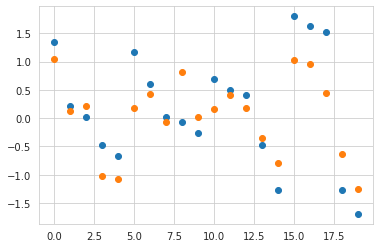

In [90]:
plt.scatter(x=y.index[:20],y=y[:20],cmap='blue')
plt.scatter(x=y.index[:20],y=y_pred[:20],cmap='red')

(array([3., 1., 3., 1., 4., 6., 5., 3., 2., 2.]),
 array([-1.08840996, -0.89080626, -0.69320256, -0.49559886, -0.29799516,
        -0.10039147,  0.09721223,  0.29481593,  0.49241963,  0.69002333,
         0.88762703]),
 <a list of 10 Patch objects>)

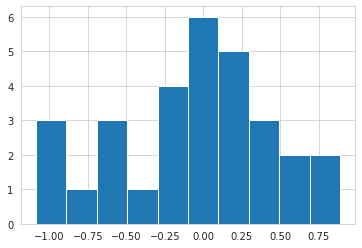

In [91]:
plt.hist((y_pred-y))

# **Saving the model** 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [92]:
import pickle

filename = '/content/drive/MyDrive/datatrained/baseball/model.sav'
pickle.dump(svr, open(filename, 'wb'))

# **Conclusion**

In [100]:

filename = '/content/drive/MyDrive/datatrained/baseball/model.sav'
model = pickle.load(open(filename, 'rb'))

In [101]:
y_pred = model.predict(x)
from sklearn.metrics import mean_squared_error as rms, r2_score
print(r2_score(y,y_pred))
print(rms(y,y_pred))


0.732769720830871
0.2672302791691289


In [102]:
pd.concat([pd.DataFrame(y_pred),pd.DataFrame(y)],axis=1).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,1.051345,0.121935,0.214233,-1.026852,-1.080285,0.188227,0.430858,-0.065125,0.815719,0.023210,0.154108,0.401522,0.171464,-0.345441,-0.790956,1.029355,0.958365,0.441482,-0.639652,-1.251318,1.046728,0.299424,-0.872702,-1.299550,-1.194759,0.174010,0.543457,0.133741,-0.712946,-0.409260
W,1.346831,0.218776,0.025401,-0.465455,-0.664924,1.162425,0.600735,0.025401,-0.071908,-0.267804,0.695263,0.505828,0.410537,-0.465455,-1.274917,1.802043,1.620930,1.529892,-1.274917,-1.692009,0.883208,0.218776,-0.967679,-1.378372,-1.797684,1.069705,0.314855,-0.169640,-0.664924,-1.274917
